![LogoUnrn](../logounrn.png)

# Proyecto Final Inteligencia Artificial

## Predicción de la Aparición de Diabetes Usando Datos de Pacientes con Aprendizaje Automático


Este proyecto utiliza datos de pacientes (edad, peso, presión arterial, etc.) para predecir la probabilidad de desarrollar diabetes mediante diversas técnicas de aprendizaje automático. Compararemos la efectividad de los algoritmos K-Nearest Neighbors, SVM y Random Forest.

**Autora:**
     Torletti Lara (lara.a.torletti@gmail.com)

**Materia:**
    Inteligencia Artificial - B4990

**Profesor:**
    Federico Tula

**Carrera:**
    Ingeniería Electrónica

**Universidad:**
    Universidad Nacional de Río Negro - Sede Andina

--------

### Importación de las librerías necesarias

In [43]:
import pandas as pd # Para manipulación de datos
import numpy as np  # Para operaciones numéricas
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer
from sklearn.model_selection import cross_validate

# Importar la clase KNeighborsClassifier desde la biblioteca scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

# Importar la clase SVC desde la biblioteca scikit-learn
from sklearn.svm import SVC

# Importar la clase RandomForestClassifier desde la biblioteca scikit-learn
from sklearn.ensemble import RandomForestClassifier

### Carga y exploración de los datos

In [3]:
# Cargar el conjunto de datos = dataframe (df)
df = pd.read_csv('../data/diabetes.csv') # Reemplaza con la ruta a tu conjunto de datos

# Mostrar las primeras filas del conjunto de datos
df.head() # Verificación rápida para ver la estructura del conjunto de datos

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
print(f"Tipo de datos: {df.dtypes}\n")

Tipo de datos: Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object



In [12]:
print(f"Info: {df.info()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Info: None



In [10]:

df.describe() #Descripción de los datos

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


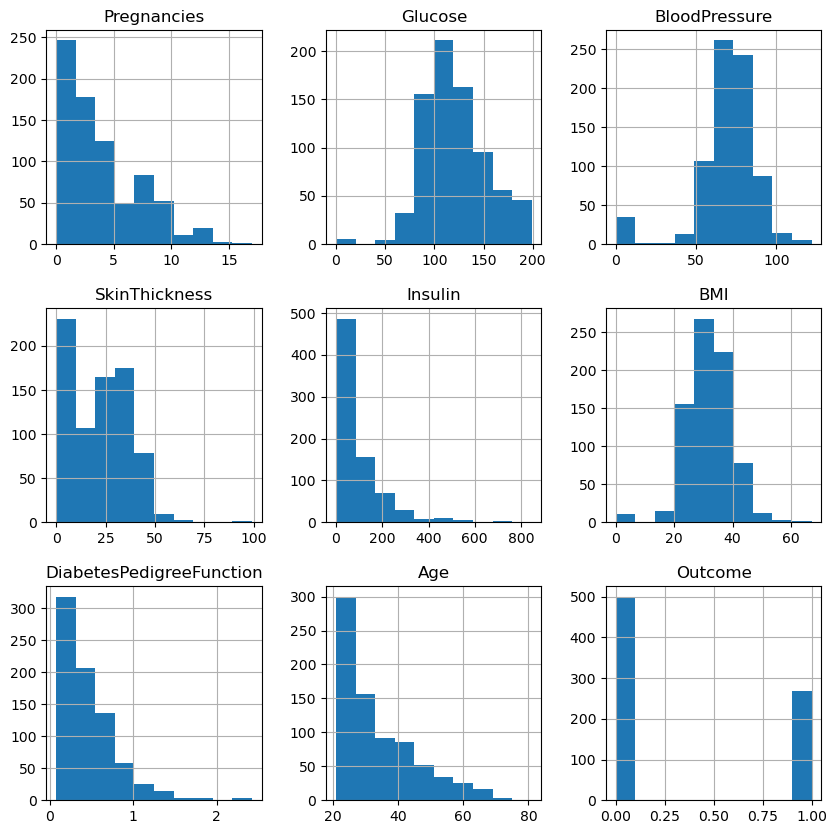

In [14]:
df.hist(bins=10,figsize=(10,10)) # Histograma para visualizar la distribución de los datos
plt.show()

### Preprocesamiento de datos

In [15]:
# Verificar si hay valores faltantes y contar el número de valores faltantes en cada columna
# df.isnull().any() muestra si hay algún valor faltante en cada columna
# df.isnull().sum() muestra el número total de valores faltantes en cada columna

# Verificar si hay valores faltantes en cualquier columna
print("¿Hay valores faltantes en alguna columna?")
print(df.isnull().any())

# Contar el número de valores faltantes en cada columna
print("\nNúmero de valores faltantes en cada columna:")
print(df.isnull().sum())

¿Hay valores faltantes en alguna columna?
Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

Número de valores faltantes en cada columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
#Si tiene datos nulos
#Se reemplaza con el valor 0 como reemplazo para los valores faltantes.
#df.fillna(0, inplace=True)
#df.isnull().any()

In [21]:
#Tabla de Correlacion
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


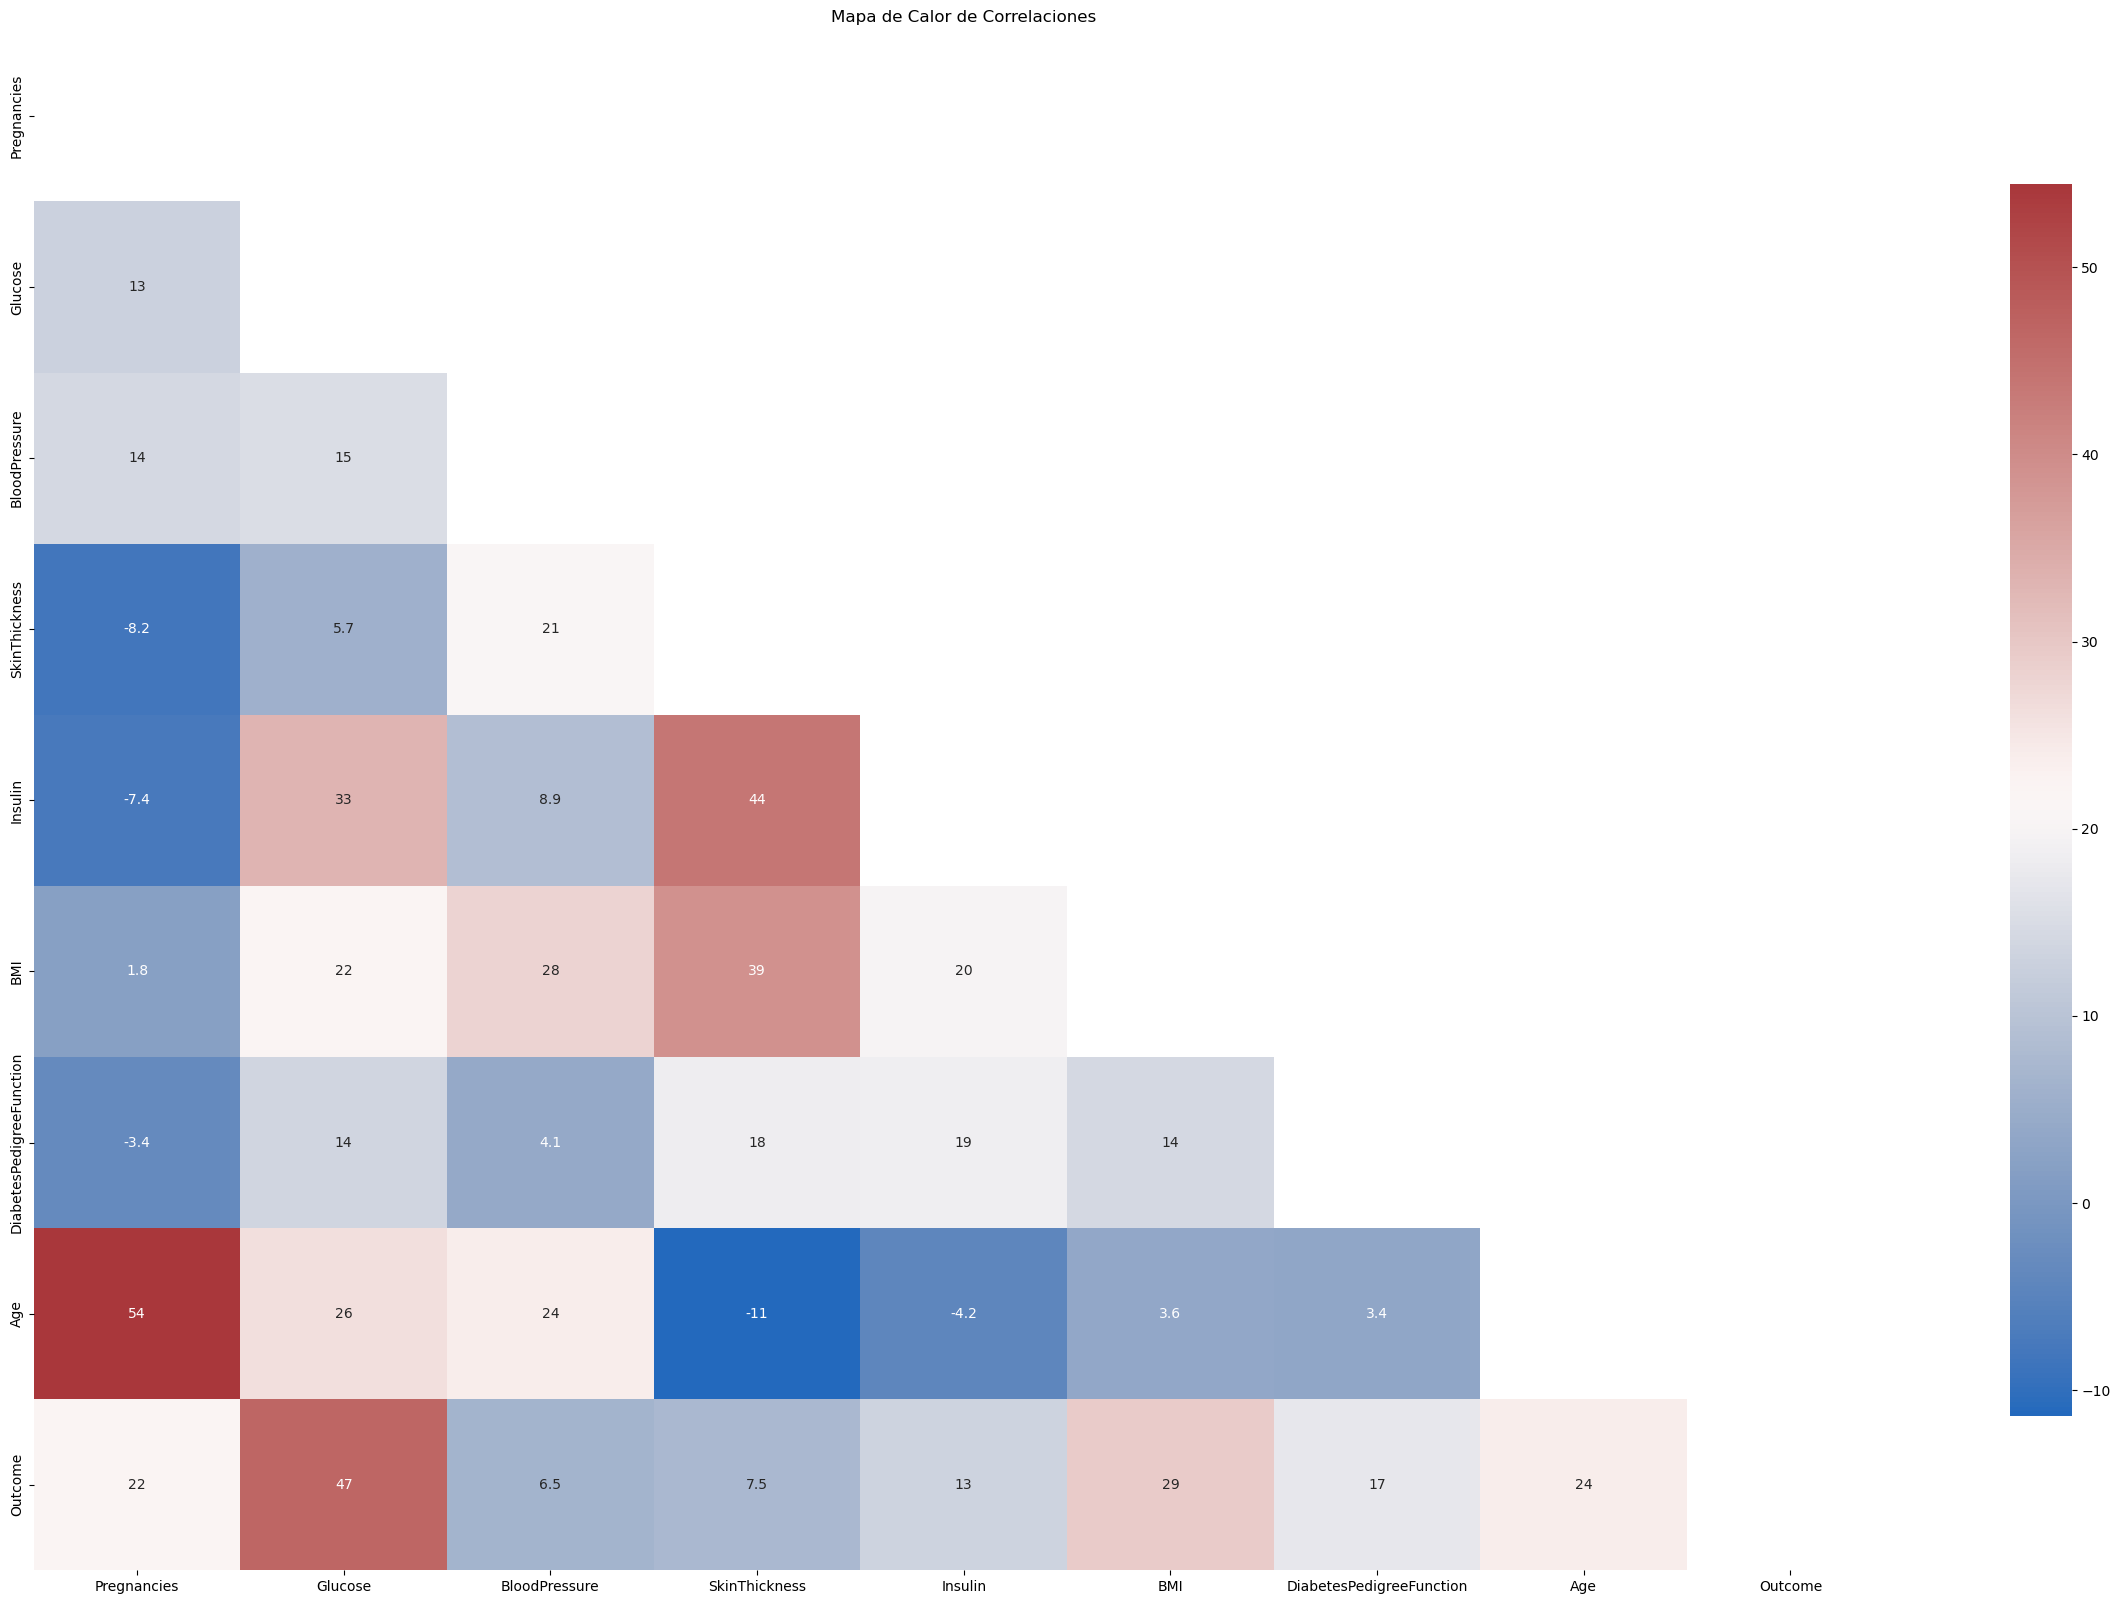

In [22]:

# Crear una máscara para el triángulo superior
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Configurar el tamaño de la figura
plt.figure(figsize=(30, 20))

# Crear un mapa de calor para la tabla de correlación
sns.heatmap(corr * 100, annot=True, mask=mask, cmap='vlag', cbar_kws={"shrink": .8})
plt.title('Mapa de Calor de Correlaciones')
plt.show()

/tmp/ipykernel_6196/1578218172.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Outcome'], palette=palette)


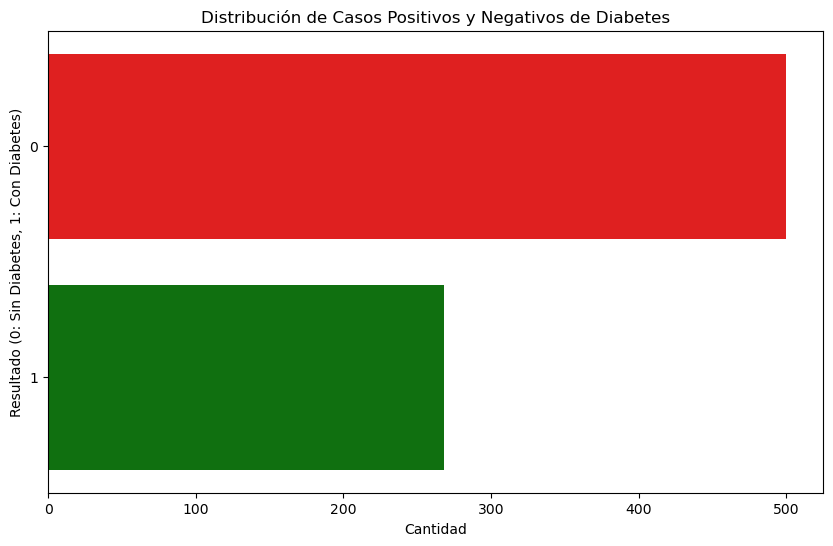

In [23]:
# Countplot para visualizar los casos positivos y negativos de diabetes
plt.figure(figsize=(10, 6))
palette = ["red", "green"]
sns.countplot(y=df['Outcome'], palette=palette)
plt.title('Distribución de Casos Positivos y Negativos de Diabetes')
plt.xlabel('Cantidad')
plt.ylabel('Resultado (0: Sin Diabetes, 1: Con Diabetes)')
plt.show()

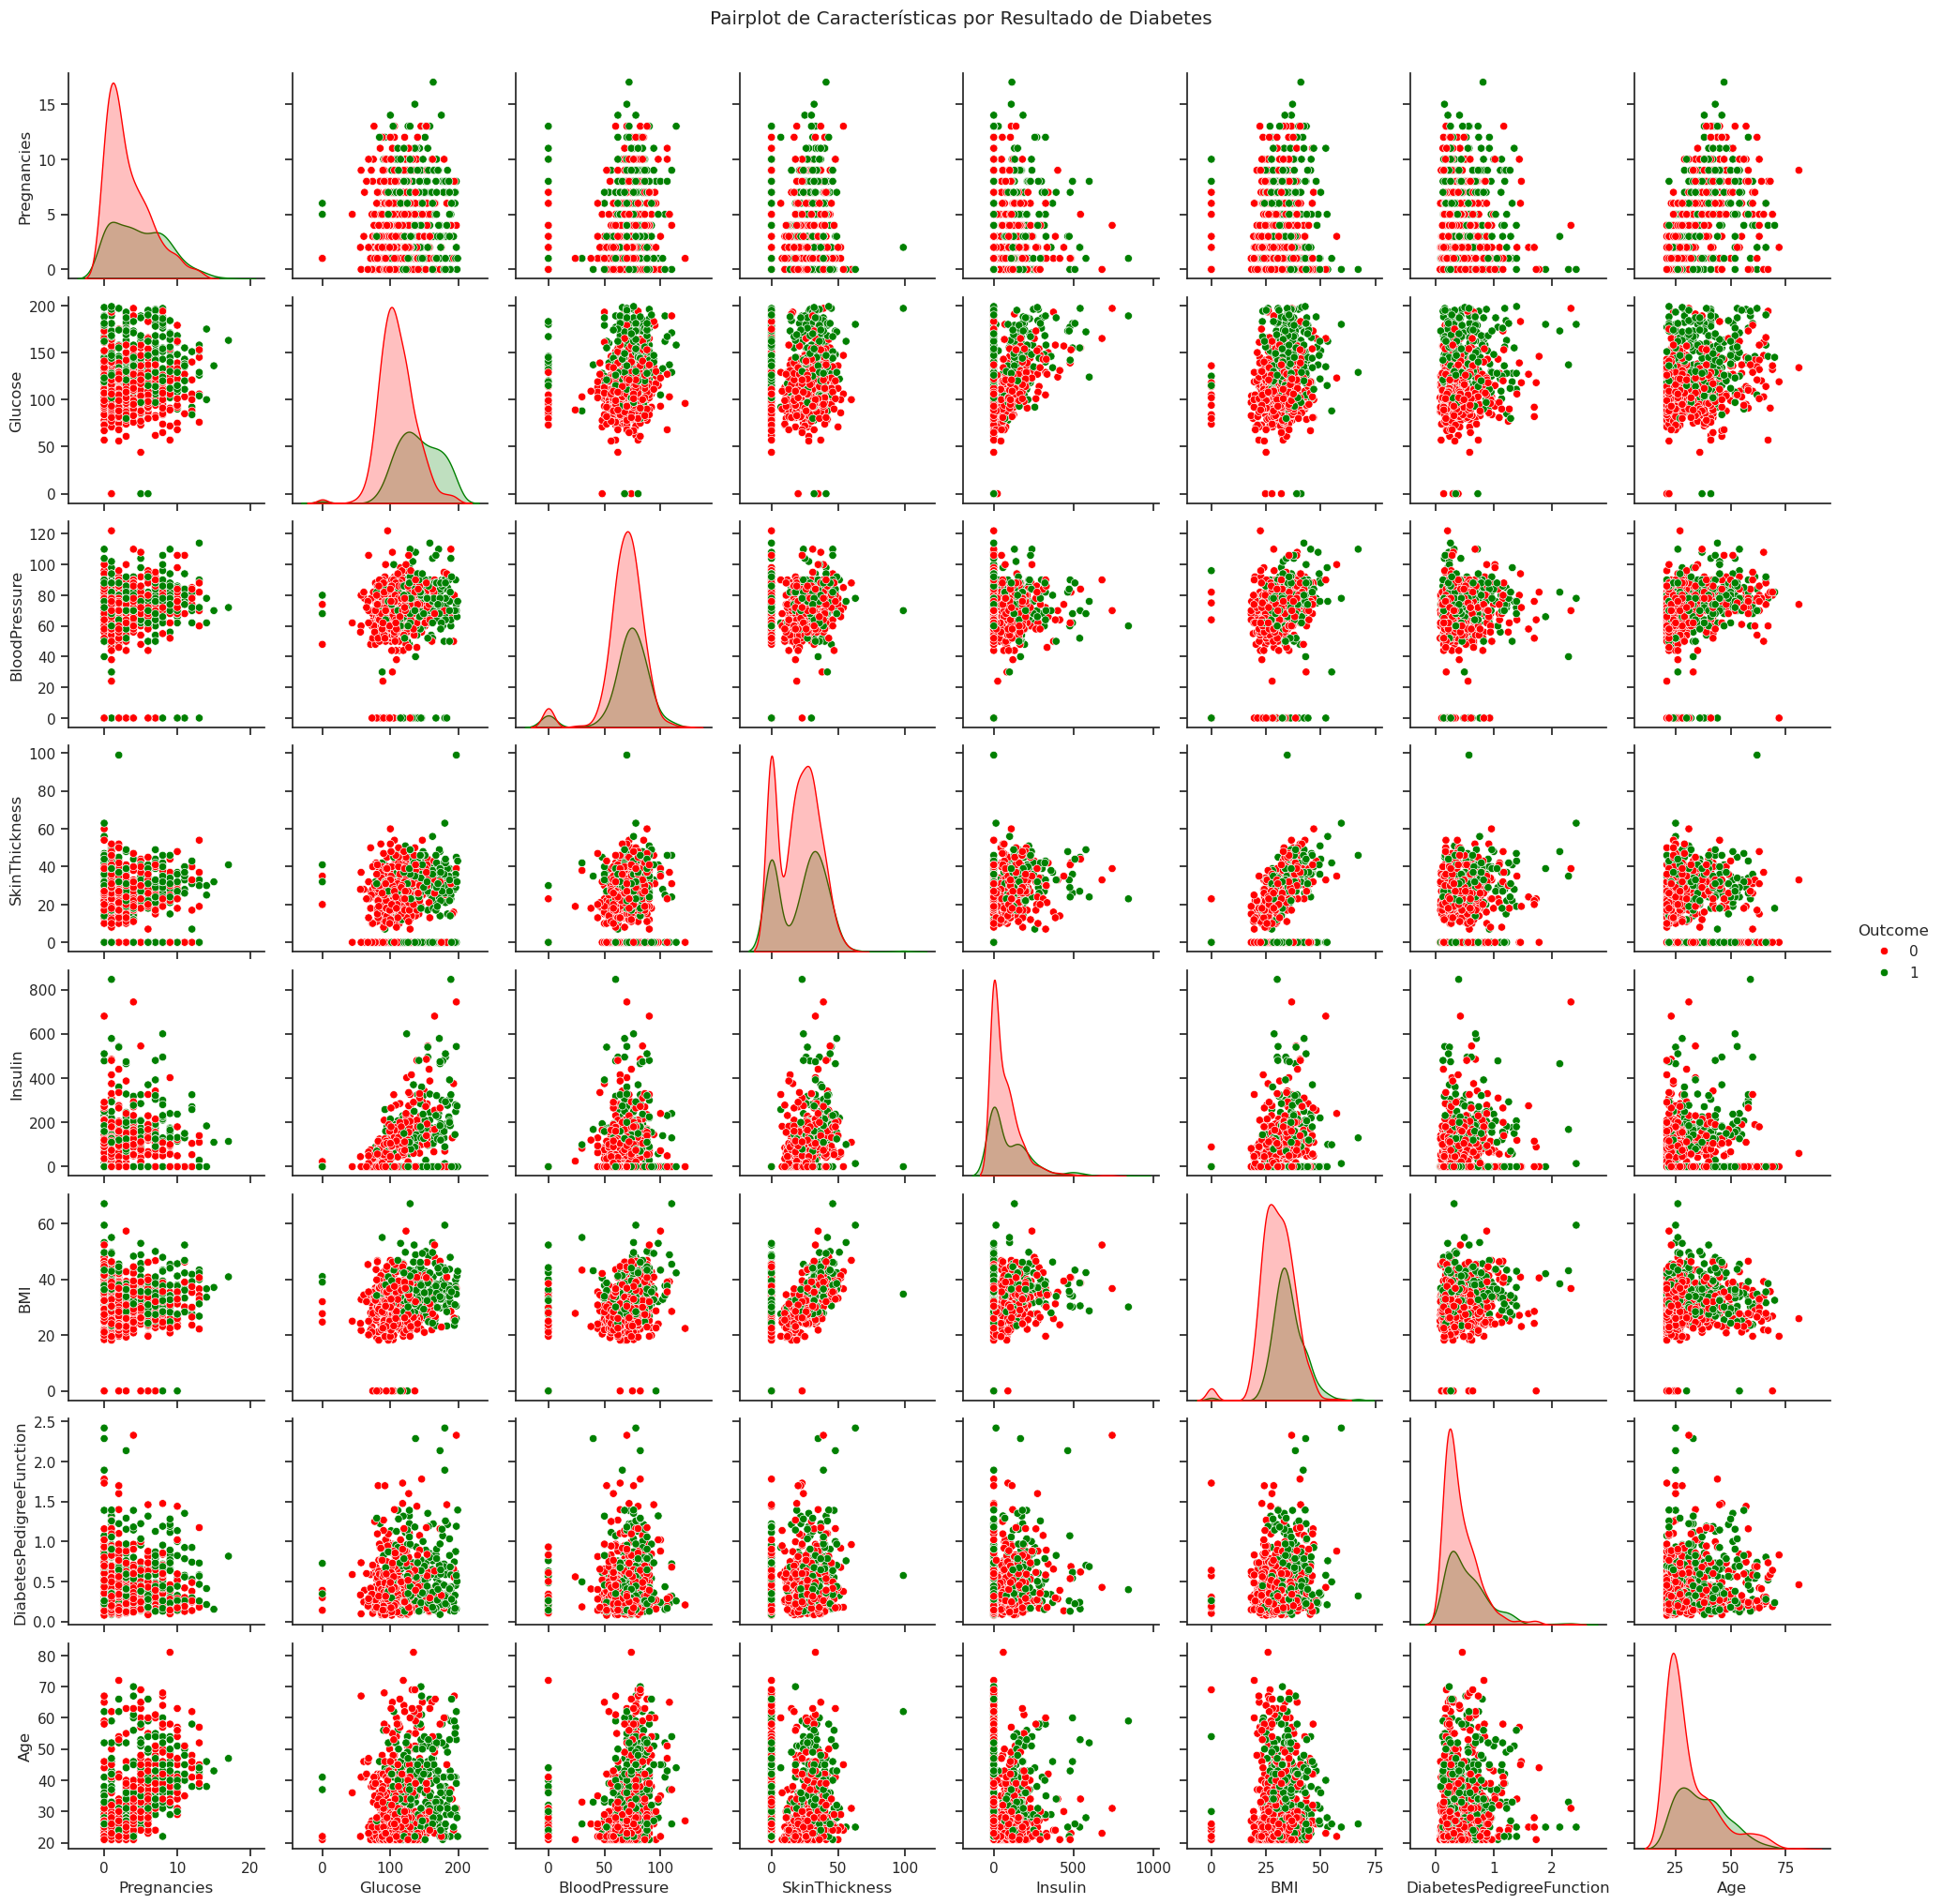

In [27]:
# Diagrama de Pares (Pairplot) para Visualización de Relaciones
sns.set_theme(style="ticks", palette=palette)
sns.pairplot(df, hue="Outcome", diag_kind="kde")
plt.suptitle('Pairplot de Características por Resultado de Diabetes', y=1.02)
plt.show()

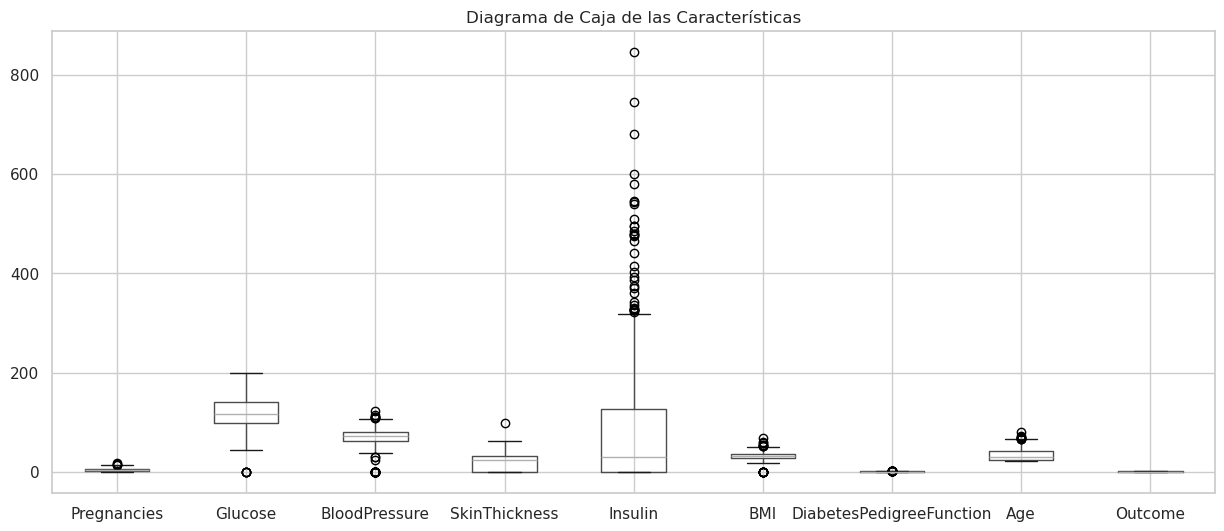

In [28]:
# Diagrama de Caja para Visualización de Valores Atípicos
plt.figure(figsize=(15, 6))
sns.set_theme(style="whitegrid")
df.boxplot()
plt.title('Diagrama de Caja de las Características')
plt.show()

### Preparacion de los datos

In [29]:
# Calcular el rango intercuartílico (IQR)
Q1 = df.quantile(0.25)  # Primer cuartil (Q1)
Q3 = df.quantile(0.75)  # Tercer cuartil (Q3)
IQR = Q3 - Q1  # Rango intercuartílico (IQR)

In [30]:
# Eliminar outliers y comparar el dataset limpio (df_out) con el anterior
df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Dimensiones del conjunto de datos original: {df.shape}")
print(f"Dimensiones del conjunto de datos sin outliers: {df_out.shape}")

Dimensiones del conjunto de datos original: (768, 9)
Dimensiones del conjunto de datos sin outliers: (639, 9)


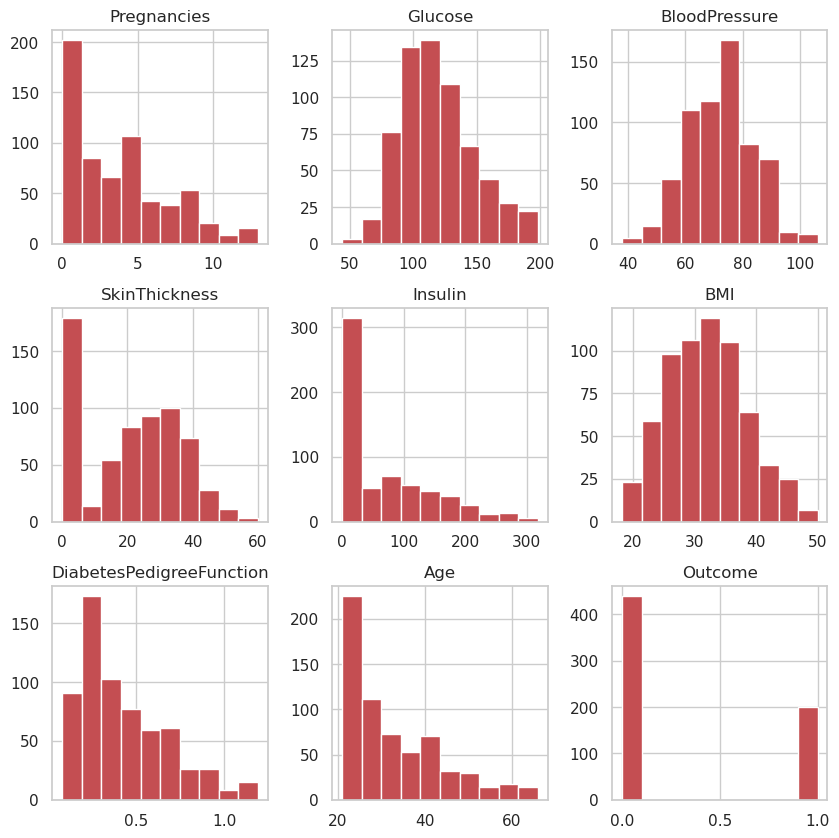

In [31]:
# Histograma Actualizado
df_out.hist(bins=10, figsize=(10, 10), color='r')
plt.show()

In [32]:
# Extracción de las características y objetivo
X = df_out.drop(columns=['Outcome'])  # Características
y = df_out['Outcome']  # Objetivo

In [33]:
# División de datos de prueba y entrenamiento en una relación 80:20
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Calcular las métricas de evaluación: TN, FP, FN y TP
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

In [38]:
# Impresión para la Validación Cruzada
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'tp': make_scorer(tp),
    'tn': make_scorer(tn),
    'fp': make_scorer(fp),
    'fn': make_scorer(fn)
}

def display_result(result):
    print("TP: ", result['test_tp'])
    print("TN: ", result['test_tn'])
    print("FN: ", result['test_fn'])
    print("FP: ", result['test_fp'])

In [39]:
# Listas para almacenar la precisión y la curva ROC_AUC 
acc = []
roc = []

### Modelos de prediccion

#### K-Nearest Neighbors (KNN)

In [55]:
knn = KNeighborsClassifier(n_neighbors=3)  # Inicializar el modelo KNN con 5 vecinos
knn.fit(train_X, train_y)  # Entrenar el modelo
knn_predictions = knn.predict(test_X)  # Hacer predicciones en el conjunto de prueba

# Evaluar KNN
knn_accuracy = accuracy_score(test_y, knn_predictions)
knn_precision = precision_score(test_y, knn_predictions)
knn_recall = recall_score(test_y, knn_predictions)
knn_f1 = f1_score(test_y, knn_predictions)

print(f"KNN Accuracy: {knn_accuracy}")
print(f"KNN Precision: {knn_precision}")
print(f"KNN Recall: {knn_recall}")
print(f"KNN F1 Score: {knn_f1}")

# Realizar validación cruzada con 10 folds
result = cross_validate(knn, train_X, train_y, scoring=scoring, cv=10)
display_result(result)


KNN Accuracy: 0.765625
KNN Precision: 0.5882352941176471
KNN Recall: 0.5555555555555556
KNN F1 Score: 0.5714285714285714
TP:  [ 5  9  8  8  6  8  7 11  8  7]
TN:  [29 26 32 30 27 30 29 29 29 30]
FN:  [12  8  9  9 10  8  9  5  8  9]
FP:  [6 8 2 4 8 5 6 6 6 5]


#### Support Vector Machine (SVM)

In [57]:
svm = SVC(kernel='linear')  # Inicializar el modelo SVM lineal
svm.fit(train_X, train_y)  # Entrenar el modelo
svm_predictions = svm.predict(test_X)  # Hacer predicciones en el conjunto de prueba

# Evaluar SVM
svm_accuracy = accuracy_score(test_y, svm_predictions)
svm_precision = precision_score(test_y, svm_predictions)
svm_recall = recall_score(test_y, svm_predictions)
svm_f1 = f1_score(test_y, svm_predictions)

print(f"SVM Accuracy: {svm_accuracy}")
print(f"SVM Precision: {svm_precision}")
print(f"SVM Recall: {svm_recall}")
print(f"SVM F1 Score: {svm_f1}")

# Realizar validación cruzada con 10 folds
result = cross_validate(svm, train_X, train_y, scoring=scoring, cv=10)
display_result(result)

SVM Accuracy: 0.8046875
SVM Precision: 0.7619047619047619
SVM Recall: 0.4444444444444444
SVM F1 Score: 0.5614035087719298
TP:  [10  7  9  9  7 11  8  8 10  5]
TN:  [32 30 34 33 31 32 32 29 26 34]
FN:  [ 7 10  8  8  9  5  8  8  6 11]
FP:  [3 4 0 1 4 3 3 6 9 1]


#### Random Forest 

In [64]:
rf = RandomForestClassifier()  # Inicializar el modelo Random Forest
rf.fit(train_X, train_y)  # Entrenar el modelo
rf_predictions = rf.predict(test_X)  # Hacer predicciones en el conjunto de prueba

# Evaluar Random Forest
rf_accuracy = accuracy_score(test_y, rf_predictions)
rf_precision = precision_score(test_y, rf_predictions)
rf_recall = recall_score(test_y, rf_predictions)
rf_f1 = f1_score(test_y, rf_predictions)

print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Random Forest Precision: {rf_precision}")
print(f"Random Forest Recall: {rf_recall}")
print(f"Random Forest F1 Score: {rf_f1}")

# Realizar validación cruzada con 10 folds
result = cross_validate(rf, train_X, train_y, scoring=scoring, cv=10)
display_result(result)

Random Forest Accuracy: 0.8515625
Random Forest Precision: 0.7931034482758621
Random Forest Recall: 0.6388888888888888
Random Forest F1 Score: 0.7076923076923077
TP:  [ 8  9 10  8  7 10  9  9  6  7]
TN:  [30 30 33 31 29 30 30 32 28 33]
FN:  [ 9  8  7  9  9  6  7  7 10  9]
FP:  [5 4 1 3 6 5 5 3 7 2]


### Verificación y Visualización de Resultados

In [66]:
# Nos aseguriamos de que 'acc' solo tenga tres valores
acc = acc[:3]
roc = roc[:3]

# Verificar las longitudes de las listas
print(f"Length of acc: {len(acc)}")
print(f"Length of labels: {len(['KNN', 'SVM', 'Random Forest'])}")

Length of acc: 3
Length of labels: 3


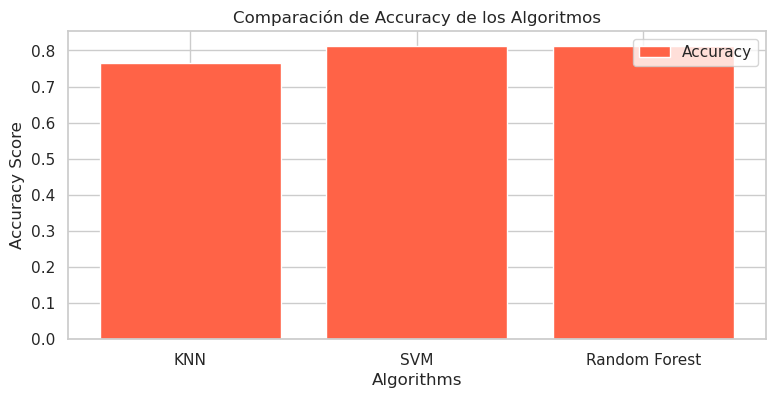

In [67]:
# Gráfico de barras para la comparación.
ax = plt.figure(figsize=(9, 4))

# Crear gráfico de barras para accuracy
plt.bar(['KNN', 'SVM', 'Random Forest'], acc, label='Accuracy', color='tomato')
plt.ylabel('Accuracy Score')  # Etiqueta del eje y
plt.xlabel('Algorithms')  # Etiqueta del eje x
plt.legend()  # Mostrar la leyenda
plt.title('Comparación de Accuracy de los Algoritmos')  # Título del gráfico
plt.show()

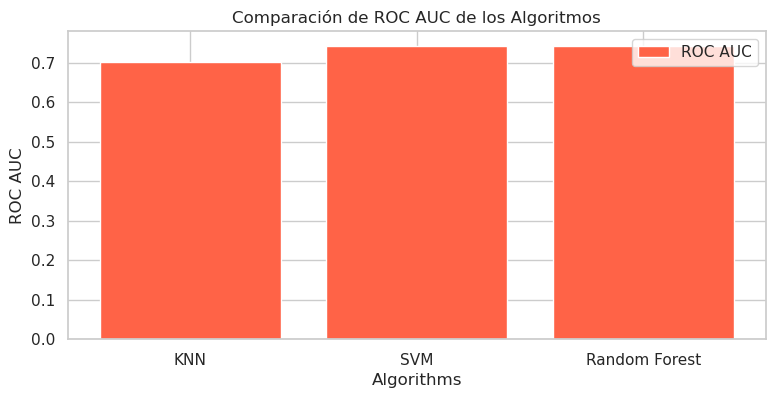

In [68]:
# Gráfico de barras para la comparación de ROC AUC.
ax = plt.figure(figsize=(9, 4))

# Crear gráfico de barras para ROC AUC
plt.bar(['KNN', 'SVM', 'Random Forest'], roc, label='ROC AUC', color='tomato')
plt.ylabel('ROC AUC')  # Etiqueta del eje y
plt.xlabel('Algorithms')  # Etiqueta del eje x
plt.title('Comparación de ROC AUC de los Algoritmos')  # Título del gráfico
plt.legend()  # Mostrar la leyenda
plt.show()

In [71]:
print(f"K-Nearest Neighbors (KNN): Precisión - {knn_precision}%, Recall - {knn_recall}%, Puntuación F1 - {knn_f1}%")
print(f"Support Vector Machine (SVM): Precisión - {svm_precision}%, Recall - {svm_recall}%, Puntuación F1 - {svm_f1}%")
print(f"Random Forest: Precisión - {rf_precision}%, Recall - {rf_recall}%, Puntuación F1 - {rf_f1}%")

K-Nearest Neighbors (KNN): Precisión - 0.5882352941176471%, Recall - 0.5555555555555556%, Puntuación F1 - 0.5714285714285714%
Support Vector Machine (SVM): Precisión - 0.7619047619047619%, Recall - 0.4444444444444444%, Puntuación F1 - 0.5614035087719298%
Random Forest: Precisión - 0.7931034482758621%, Recall - 0.6388888888888888%, Puntuación F1 - 0.7076923076923077%


- Precisión: Mide la proporción de verdaderos positivos sobre el total de positivos predichos.Random Forest tiene la mayor precisión, lo que significa que, de todas las predicciones positivas, es el que tiene más verdaderos positivos. Lo sigue SVM y luego KNN.

- Recall: Mide la proporción de verdaderos positivos sobre el total de positivos reales. Random Forest tiene el mayor recall, seguido por KNN y luego SVM.

- Puntuación F1: Es una medida que combina precisión y recall en un solo número. Es útil para evaluar el equilibrio entre precisión y recall. En este caso, el Random Forest tiene la puntuación F1 más alta.

#### El algoritmo Random Forest resultó ser el modelo más efectivo para predecir la diabetes.

En el análisis de los modelos de clasificación para predecir diabetes utilizando el dataset de Pima Indians, los resultados indican que el Random Forest es el modelo más robusto y equilibrado, ya que no solo presenta el mejor rendimiento general en términos de puntuación F1, sino que también ofrece una combinación superior de precisión y recall. Esto lo convierte en el modelo más confiable y efectivo para la predicción de diabetes en este caso. 
Por otro lado el SVM muestra una mayor precisión, su bajo recall limita su utilidad práctica, y el KNN ofrece un rendimiento intermedio.